In [1]:
import numpy as np
import matplotlib.pyplot as plt

zmin = 0.0
zmax = 1000.0

dz = 5.0

t0 = 0.0
tf = 2000.0

dt = 5.0

Ks = 0.72e-4*3600 # Saturated hydraulic conductivity in cm/hr
dhdtheta = 8 # Soil-water characteristics curve

Ds = Ks*dhdtheta

In [2]:
flag = 0
count = 1
while (flag==0):
    
    c = Ks*dt/dz
    alpha = Ds*dt/(dz**2)
    
    if((c**2 <= 2*alpha) and ((alpha + c/4) <= 0.5)):
        flag = 1
    else:
        dt = dt/2
        
    count = count + 1
    
print('Final timestep = '+str(dt))

Final timestep = 5.0


In [3]:
z = np.arange(dz/2, zmax, dz)
Nz = z.size

In [4]:
t = np.arange(t0, tf, dt)
Nt = t.size

#### Define Initial Condition

In [5]:
theta0 = 0.2 * np.ones((Nz))
#theta0[0] = 0.2

#### Define Boundary Condition

In [6]:
thetatop = np.ones((Nt))

In [7]:
theta = np.zeros((Nz,Nt))

In [8]:
for i in np.arange(Nt):
    
    if(i==0):
        theta_i = theta0
    else:
        theta_i = theta[:,i-1]
        
    theta_ip1 = np.zeros((Nz))
    
    for j in np.arange(Nz):
        
        if(j==0):
            theta_ip1[j] = thetatop[i]
        elif(j==1):
            theta_ip1[j] = theta_i[j] - c*((1/8)*theta_i[j] - (7/8)*theta_i[j-1] + (3/8)*theta_i[j] 
                + (3/8)*theta_i[j+1]) + alpha*(theta_i[j-1] - 2*theta_i[j] + theta_i[j+1])
        elif(j==(Nz-1)):
            theta_ip1[j] = theta_i[j] - c*((1/8)*theta_i[j-2] - (7/8)*theta_i[j-1] + (3/8)*theta_i[j] 
                + (3/8)*theta_i[j]) + alpha*(theta_i[j-1] - 2*theta_i[j] + theta_i[j])
        else:
            theta_ip1[j] = theta_i[j] - c*((1/8)*theta_i[j-2] - (7/8)*theta_i[j-1] + (3/8)*theta_i[j] 
                + (3/8)*theta_i[j+1]) + alpha*(theta_i[j-1] - 2*theta_i[j] + theta_i[j+1])
    
    theta[:,i] = theta_ip1


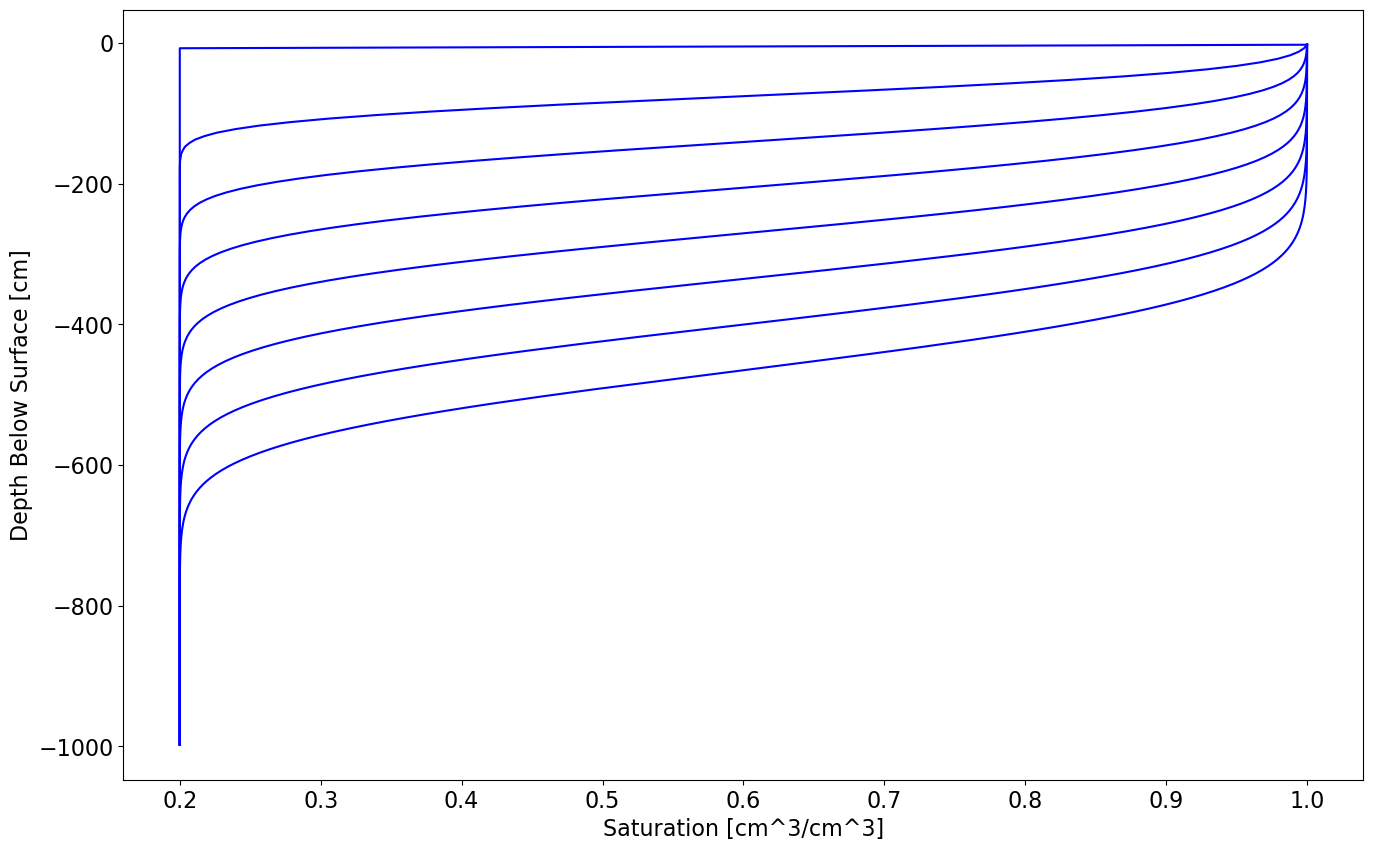

In [9]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))

for p in np.arange(0,Nt,50):
    plt.plot(theta[:,p],-z,'b')

plt.xlabel('Saturation [cm^3/cm^3]')
plt.ylabel('Depth Below Surface [cm]')
plt.show()